## • **PART 1**
## • **DOMAIN:** Entertainment
## • **CONTEXT:**
Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision
and multimedia experts who need to detect faces from screen shots from the movie scene.
## • **DATA DESCRIPTION:**
The dataset comprises of images and its mask where there is a human face.
## • **PROJECT OBJECTIVE:** Face detection from training images.
**Steps and tasks: [ Total Score: 20 points]**
1. Import the dataset.
2. Create features (images) and labels (mask) using that data.
3. Mask detection model:<br>
  • Design a face mask detection model.<br>
  • Design your own Dice Coefficient and Loss function.<br>
  • Train, tune and test the model.<br>
  • Evaluate the model using testing data.
4. Use the “Prediction image” as an input to your designed model and display the output of the image.


## 1. Import the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhG6SjIWydzxgDzPIwpdizQeJfTNbiAsHWbOoY61i3wwnjHM87WKVc
Mounted at /content/drive


In [ ]:
import numpy as np
df = np.load('/content/drive/MyDrive/ACV Project 1 Dataset /Dataset- Images.npy', allow_pickle=True)

In [ ]:
df.size

818

In [ ]:
df.shape

(409, 2)

In [ ]:
# checking one sample image and mask from data

print(df[50][0])
print(df[50][1])

[[[ 34  39  35]
  [ 32  37  33]
  [ 33  38  34]
  ...
  [ 95 115 122]
  [ 97 117 124]
  [100 119 126]]

 [[ 38  43  39]
  [ 36  41  37]
  [ 36  41  37]
  ...
  [ 99 119 126]
  [101 121 128]
  [104 123 130]]

 [[ 45  50  46]
  [ 41  47  43]
  [ 40  45  41]
  ...
  [101 121 128]
  [103 123 130]
  [104 123 130]]

 ...

 [[ 10  11  13]
  [ 10  11  13]
  [ 10  11  13]
  ...
  [ 37  42  48]
  [ 37  42  48]
  [ 37  42  48]]

 [[ 10  11  13]
  [ 10  11  13]
  [ 10  11  13]
  ...
  [ 37  42  48]
  [ 36  41  47]
  [ 36  41  47]]

 [[ 10  11  13]
  [ 10  11  13]
  [ 10  11  13]
  ...
  [ 37  42  48]
  [ 35  40  46]
  [ 35  40  46]]]
[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.685807150595883, 'y': 0.24209486166007904}, {'x': 0.7865655471289275, 'y': 0.43379446640316205}], 'imageWidth': 1000, 'imageHeight': 1096}]


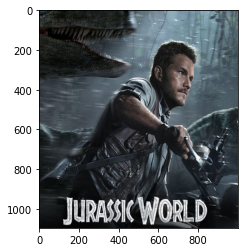

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(df[50][0])

## 2. Create features (images) and labels (mask) using that data.

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

img_height = 224
img_width = 224

masks = np.zeros((int(df.shape[0]), img_height, img_width))
X_train = np.zeros((int(df.shape[0]), img_height, img_width, 3))
for index in range(df.shape[0]):
  img = df[index][0]
  img = cv2.resize(img, dsize=(img_height, img_width), interpolation=cv2.INTER_CUBIC)
  try:
    img = img[:, :, :3]
  except:
    continue
  X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
  for i in df[index][1]:
    x1 = int(i["points"][0]['x'] * img_width)
    x2 = int(i["points"][1]['x'] * img_width)
    y1 = int(i["points"][0]['y'] * img_height)
    y2 = int(i["points"][1]['y'] * img_height)
    masks[index][y1:y2, x1:x2] = 1

In [ ]:
print('Features :', X_train.shape)
print('Labels :', masks.shape)

Features : (409, 224, 224, 3)
Labels : (409, 224, 224)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.68627453 -0.64705884 -0.67058825]
  [-0.69411767 -0.68627453 -0.72549021]
  [-0.72549021 -0.68627453 -0.68627453]
  ...
  [-0.39607841 -0.21568626 -0.15294117]
  [-0.42745095 -0.24705881 -0.19999999]
  [-0.19999999 -0.04313725  0.01176476]]

 [[-0.63921571 -0.62352943 -0.64705884]
  [-0.5529412  -0.53725493 -0.57647061]
  [-0.5529412  -0.52941179 -0.50588238]
  ...
  [-0.41176468 -0.23137254 -0.17647058]
  [-0.34901959 -0.16862744 -0.12156862]
  [-0.23921567 -0.0745098  -0.01960784]]

 [[-0.7647059  -0.68627453 -0.67058825]
  [-0.8509804  -0.7647059  -0.75686276]
  [-0.71764708 -0.67843139 -0.6156863 ]
  ...
  [-0.40392154 -0.24705881 -0.1607843 ]
  [-0.36470586 -0.20784312 -0.12941176]
  [-0.28627449 -0.13725489 -0.08235294]]

 ...

 [[-0.9137255  -0.90588236 -0.89019608]
  [-0.93725491 -0.92941177 -0.9137255 ]
  [-0.93725491 -0.92941177 -0.9137255 ]
  ...
  [-0.78823531 -0.77254903 -0.72549021]
  [-0.74117649 -0.7019608  -0.67058825]
  [-0.74117649 -0.7019608  -0.67058825]]

 [

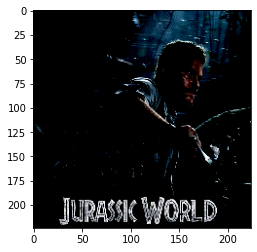

In [ ]:
from matplotlib import pyplot

print(X_train[50])
pyplot.imshow(X_train[50])

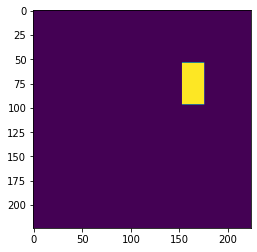

In [ ]:
from matplotlib import pyplot

pyplot.imshow(masks[50])

## 3. Mask detection model:<br>
  ● Design a face mask detection model.<br>
  ● Design your own Dice Coefficient and Loss function.<br>
  ● Train, tune and test the model.<br>
  ● Evaluate the model using testing data.

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

def create_model(trainable = True):
  img_shape = (img_height, img_width, 3)
  model = MobileNet(input_shape = img_shape, alpha = 1.0, include_top = False, weights = 'imagenet')
  for layer in model.layers:
    layer.trainable = trainable

  block0 = model.get_layer('conv_pw_1_relu').output
  block1 = model.get_layer('conv_pw_3_relu').output
  block2 = model.get_layer('conv_pw_5_relu').output
  block3 = model.get_layer('conv_pw_11_relu').output
  block4 = model.get_layer('conv_pw_13_relu').output

  x = Concatenate()([UpSampling2D()(block4), block3])
  x = Concatenate()([UpSampling2D()(x), block2])
  x = Concatenate()([UpSampling2D()(x), block1])
  x = Concatenate()([UpSampling2D()(x), block0])
  x = UpSampling2D()(x)
  x = Conv2D(1, kernel_size = 1, activation = 'sigmoid')(x)

  x = Reshape((img_height, img_width))(x)
  
  return Model(inputs = model.input, outputs = x)

In [ ]:
model = create_model()
model.summary()

17235968/17225924 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
_____________________________

In [ ]:
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon

def dice_coefficient(y_true, y_pred):
  numerator = 2 * reduce_sum(y_true * y_pred)
  denominator = reduce_sum(y_true + y_pred)
  return numerator / (denominator + epsilon())

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
  return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [ ]:
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

In [ ]:
model.fit(X_train, masks, epochs=10, batch_size=1)

Epoch 1/10
409/409 [==============================] - 75s 105ms/step - loss: 1.2215 - dice_coefficient: 0.5087
Epoch 2/10
409/409 [==============================] - 43s 105ms/step - loss: 0.8473 - dice_coefficient: 0.6012
Epoch 3/10
409/409 [==============================] - 43s 104ms/step - loss: 0.7338 - dice_coefficient: 0.6418
Epoch 4/10
409/409 [==============================] - 43s 104ms/step - loss: 0.6635 - dice_coefficient: 0.6686
Epoch 5/10
409/409 [==============================] - 43s 104ms/step - loss: 0.5581 - dice_coefficient: 0.7099
Epoch 6/10
409/409 [==============================] - 43s 104ms/step - loss: 0.5627 - dice_coefficient: 0.7134
Epoch 7/10
409/409 [==============================] - 43s 104ms/step - loss: 0.4883 - dice_coefficient: 0.7430
Epoch 8/10
409/409 [==============================] - 43s 104ms/step - loss: 0.4761 - dice_coefficient: 0.7501
Epoch 9/10
409/409 [==============================] - 43s 104ms/step - loss: 0.4396 - dice_coefficient: 0.7669
E

## 4. Use the “Prediction image” as an input to your designed model and display the output of the image.

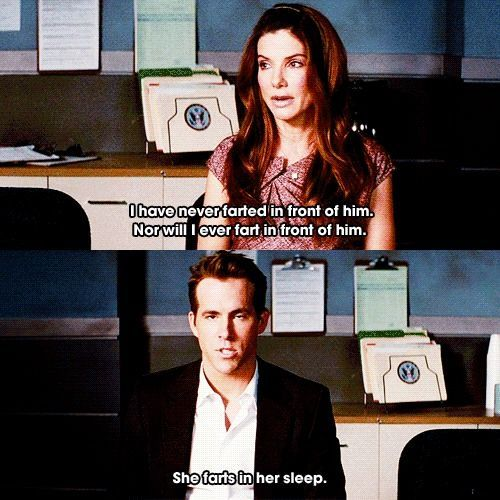

In [ ]:
from google.colab.patches import cv2_imshow

sample_image = cv2.imread('/content/drive/MyDrive/ACV Project 1 Dataset /Prediction_Image.jpeg')
cv2_imshow(sample_image)

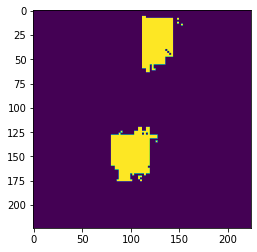

In [ ]:
sample_image = cv2.resize(sample_image, dsize=(img_height, img_width), interpolation=cv2.INTER_CUBIC)
scaled_image = preprocess_input(np.array(sample_image, dtype=np.float32))
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([scaled_image]))[0] > 0.2), (img_height, img_width))

plt.imshow(pred_mask)

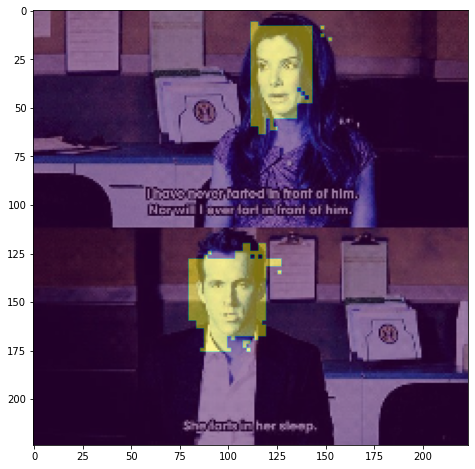

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(sample_image)
plt.imshow(pred_mask, alpha = 0.5)
plt.show()

## Conclusion
* Model was complied using binary cross entropy as loss, adam optimizer and dice coefficient as metrics.
* Best loss I got was 0.4083 and dice_coefficient of 0.7832 on the training data with just 10 epochs.
* Model weights for this were used and then used to predict on validation data to get mask.
* As seen in the above images, it can be seen that model does a very good job in predicting the masks.

## • **PART 2**
## • **TASK:** 
Help to create an image dataset to be used by the AI team to build an image classifier data. Profile images of people are given.
1. You are expected to curate the bounding box co-ordinates for each image. These are also called annotations.
2. This task can be done using manual methods where you need to open each image and note the coordinates where the face located
[though it is not recommended]. This task can be easily done using an automation where you need to input the image in the
automation and the output is the coordinates of the face detected from the image. [this is highly recommended]. Also highlight how
many faces detected in each image.
3. Comment on the challenges faced during this task.

In [ ]:
# converting npy to images
import os
import cv2

os.makedirs('/content/drive/MyDrive/images')
file_id = 1

for i in range(df.shape[0]):
  filename = str(file_id) + '.jpg'
  cv2.imwrite('/content/drive/MyDrive/images/' + filename, cv2.cvtColor(df[i][0], cv2.COLOR_RGB2BGR))
  file_id += 1

In [ ]:
import glob

data_path = os.path.join('/content/drive/MyDrive/images/','*g')
files = glob.glob(data_path)
data = []
for i in files:
  img = cv2.imread(i)
  data.append(img)

In [ ]:
dir_list = next(os.walk('/content/drive/MyDrive/images/'))[2]
len(dir_list)

409

In [ ]:
x_cord=[]
y_cord=[]
height=[]
width=[]
face_detected=[]
image_name=[]

for i in range (len(dir_list)):
  print('Execution loop :',i)
  # creating a cascade classfier object
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  data_path = os.path.join('/content/drive/MyDrive/images/',dir_list[i])
  img=cv2.imread(data_path)
  faces=face_cascade.detectMultiScale(img,scaleFactor=1.05,minNeighbors=5)
  j=0 
  # finding coordinates of the face
  for x,y,w,h in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)
    j = j+1
  resized=cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0])))
  length=len(faces)
  if length==0:
      a, b, c, d, j, name = 0, 0, 0, 0, 0, 0
  else:
    a=faces[0,0]
    b=faces[0,1]
    c=faces[0,2]
    d=faces[0,3]
    name=dir_list[i]
    
  x_cord.append(a)
  y_cord.append(b)
  width.append(c)
  height.append(d)
  face_detected.append(j)
  image_name.append(name)

Execution loop : 0
Execution loop : 1
Execution loop : 2
Execution loop : 3
Execution loop : 4
Execution loop : 5
Execution loop : 6
Execution loop : 7
Execution loop : 8
Execution loop : 9
Execution loop : 10
Execution loop : 11
Execution loop : 12
Execution loop : 13
Execution loop : 14
Execution loop : 15
Execution loop : 16
Execution loop : 17
Execution loop : 18
Execution loop : 19
Execution loop : 20
Execution loop : 21
Execution loop : 22
Execution loop : 23
Execution loop : 24
Execution loop : 25
Execution loop : 26
Execution loop : 27
Execution loop : 28
Execution loop : 29
Execution loop : 30
Execution loop : 31
Execution loop : 32
Execution loop : 33
Execution loop : 34
Execution loop : 35
Execution loop : 36
Execution loop : 37
Execution loop : 38
Execution loop : 39
Execution loop : 40
Execution loop : 41
Execution loop : 42
Execution loop : 43
Execution loop : 44
Execution loop : 45
Execution loop : 46
Execution loop : 47
Execution loop : 48
Execution loop : 49
Execution 

In [ ]:
import pandas as pd

df = pd.DataFrame(x_cord, columns = ['x'])

df['y'] = y_cord
df['w'] = width
df['h'] = height
df['Total_Faces'] = face_detected
df['Image_Name'] = image_name

df.head()

,x,y,w,h,Total_Faces,Image_Name
0,380,94,55,55,2,1.jpg
1,890,146,104,104,1,2.jpg
2,265,6,62,62,3,3.jpg
3,295,68,68,68,3,4.jpg
4,217,53,73,73,5,5.jpg


In [ ]:
df.to_csv("/content/drive/MyDrive/annotations.csv")

## 3. Comment on the challenges faced during this task.
* Manual tagging is time taking and not very accurate. Tagging differs from person to person.
* Automation tagging is completely dependent on HAAR cascader or community support. Making it risky for longer run or self reliance.